<a href="https://colab.research.google.com/github/abhip161/Simple-Linear-Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


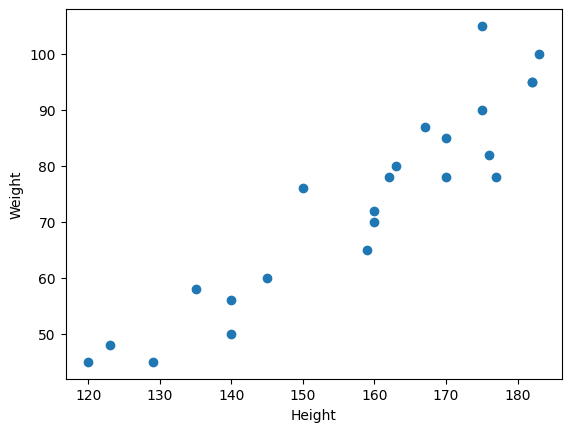

In [4]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Aim to find best fit line



1.   Divide the feature based on independent and dependent features
2.   Train test split of the data set
3.   Standardize the dataset
4. Train the Model


In [5]:
## weight -> independent
## height -> dependent
X = df[['Weight']] ## -> independent
y = df['Height']

In [6]:
from sklearn.model_selection import train_test_split

X_train, y_train for training the model


---

for  test the model X_test, y_test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [8]:
X.shape

(23, 1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
## standardize the train independent data
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

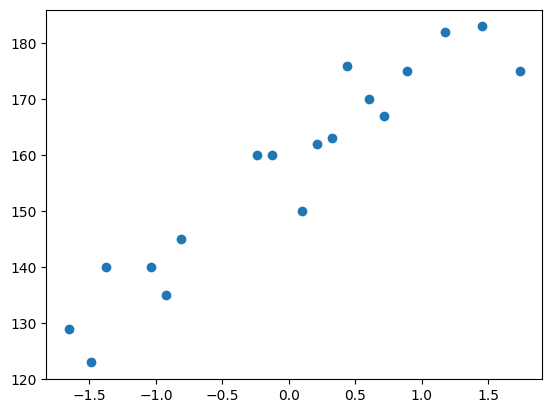

In [13]:
plt.scatter(X_train, y_train)


In [14]:
## Train the simple Linaer Regression Model
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()

In [16]:
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print("The slope or coefficient of weight is",regressor.coef_)
print("Intercept:", regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept: 157.5


plot the best fit line



--- 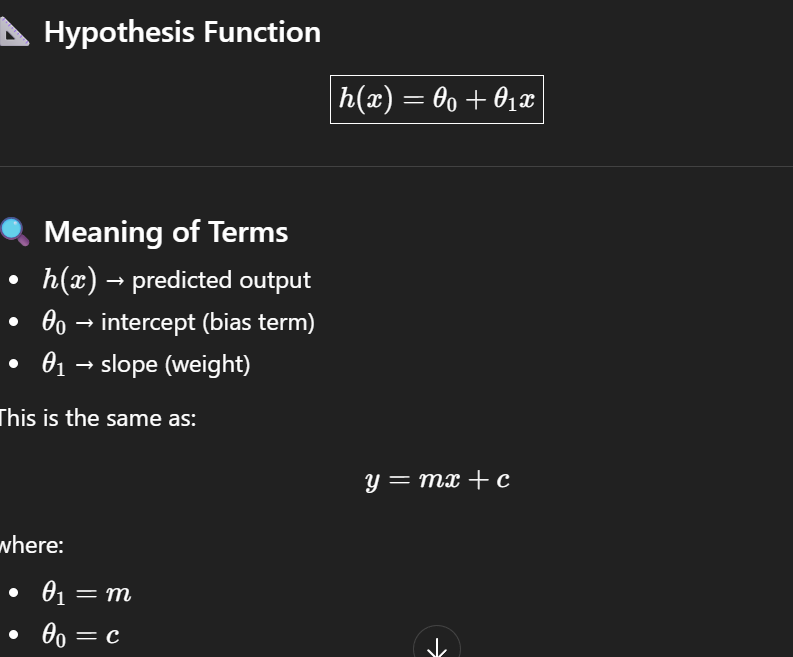





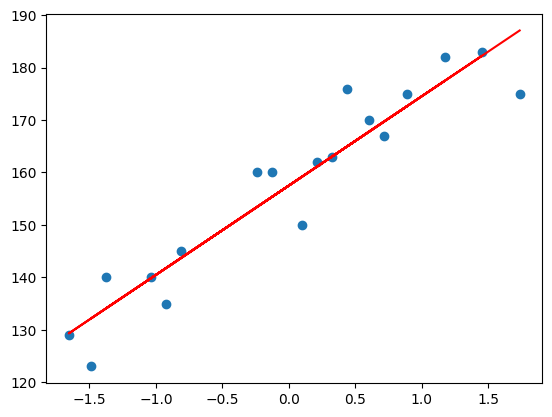

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

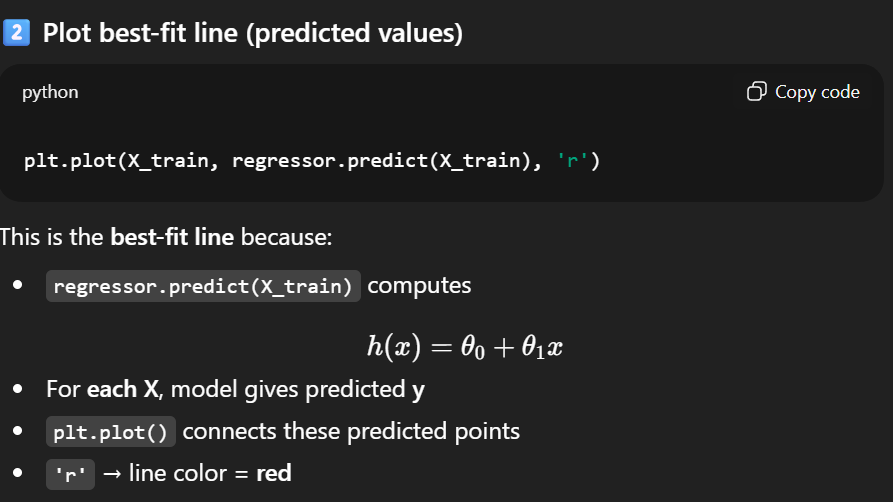

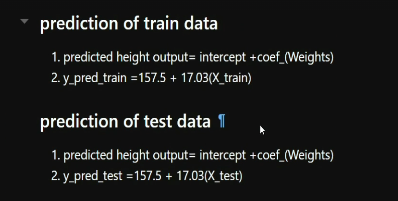

In [19]:
y_pred_test= regressor.predict(X_test)

In [22]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

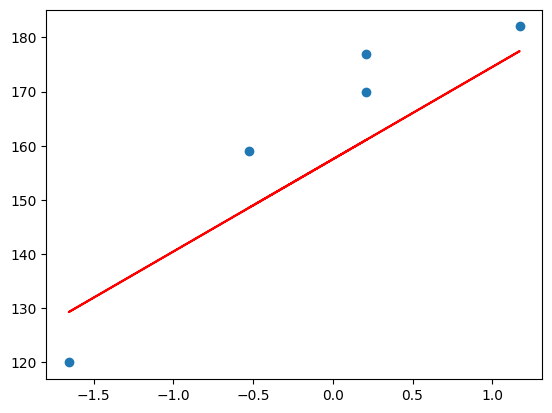

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [23]:
## Performance matrix
## MSE < MAE, and adjusted R square
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [26]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
r2 = r2_score(y_test, y_pred_test)
r2


109.77592599051664
9.822657814519232
10.477400726827081


0.776986986042344

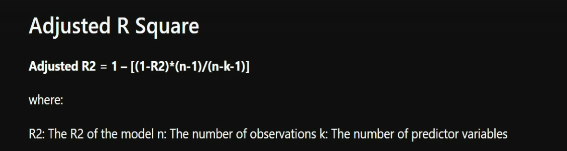

In [27]:
## Adjusted R Square
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [29]:
## new point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [31]:
[scaled_weight[0]]

[array([0.32350772])]

In [32]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


linear distrubution of y_test , y_pred_test so the prediction is correct

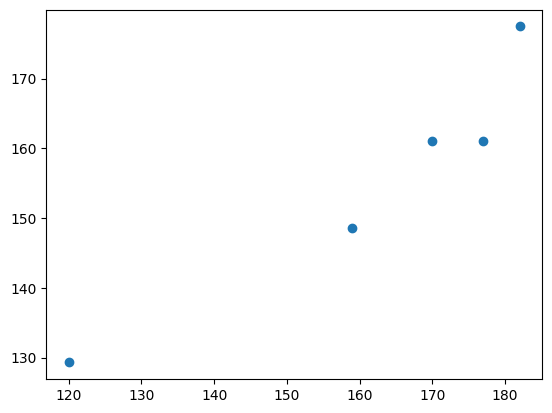

In [35]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [36]:
## Residuals
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


/tmp/ipython-input-3317286613.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde= True)


<Axes: xlabel='Height', ylabel='Density'>

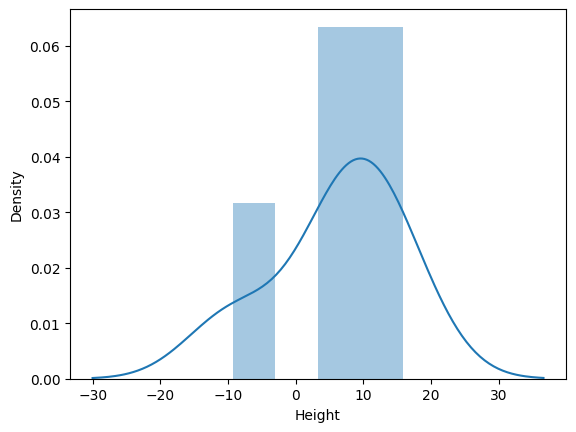

In [42]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals, kde= True)

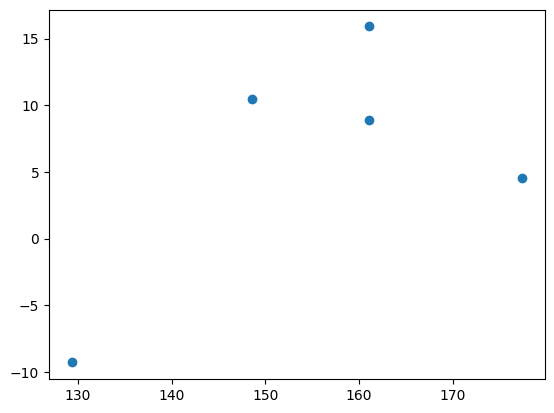

In [39]:
## 3 -> Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test, residuals)